##   BUSINESS DECISION 

In [18]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_retailer = pd.read_csv('data/retailer.csv')

In [20]:
df_retailer.shape

(9866049, 7)

In [21]:
df_retailer.head(10)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN
5,reOrpt9vhSwhbPVtni,2024-06-01 22:36:26,Product Page View,Science Diet,SD Ca Adt Lt Ckn 30lb bg,NaN,NaN
6,reOrpt9vhSwhbPVtni,2024-06-01 22:43:07,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
7,reOrpt9vhSwhbPVtni,2024-06-20 14:02:48,Product Page View,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0
9,reOrpt9vhSwhbPVtni,2024-06-01 22:47:09,Add to cart,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,NaN,NaN


In [22]:
df_retailer = df_retailer.dropna(subset=['brand', 'product_name'], how='all')
df_retailer.shape

(9588809, 7)

In [23]:
df_retailer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9588809 entries, 1 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 585.3+ MB


In [24]:
df_retailer['timestamp_utc'] = pd.to_datetime(df_retailer['timestamp_utc'])
df_retailer['date'] = df_retailer['timestamp_utc'].dt.date

In [25]:
col1 = ['event_name', 'brand']

for c in col1:
    print(f"\n=== {c} ===")
    print(df_retailer[c].unique())



=== event_name ===
['Product Page View' 'Order' 'Add to cart']

=== brand ===
['Science Diet' 'Hills' 'Prescription Diet']


In [26]:
infos = {
    "n_events": len(df_retailer),
    "n_customers": df_retailer["customer_id"].nunique(),
    "n_products": df_retailer["product_name"].nunique(),
    "n_brands": df_retailer["brand"].value_counts().to_dict(),
    "event_distribution": df_retailer["event_name"].value_counts().to_dict()
}

infos


{'n_events': 9588809,
 'n_customers': 1330505,
 'n_products': 505,
 'n_brands': {'Science Diet': 7858536,
  'Prescription Diet': 1247520,
  'Hills': 482753},
 'event_distribution': {'Product Page View': 6132515,
  'Add to cart': 2025759,
  'Order': 1430535}}

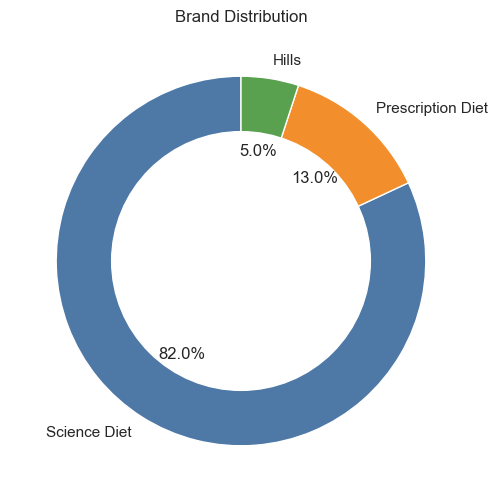

In [27]:
brand_dist = df_retailer["brand"].value_counts(dropna=False)

labels = brand_dist.index.astype(str)
sizes  = brand_dist.values
colors = ["#4E79A7", "#F28E2B", "#59A14F", "#E15759"]  # 4 couleurs

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Brand Distribution")
plt.show()

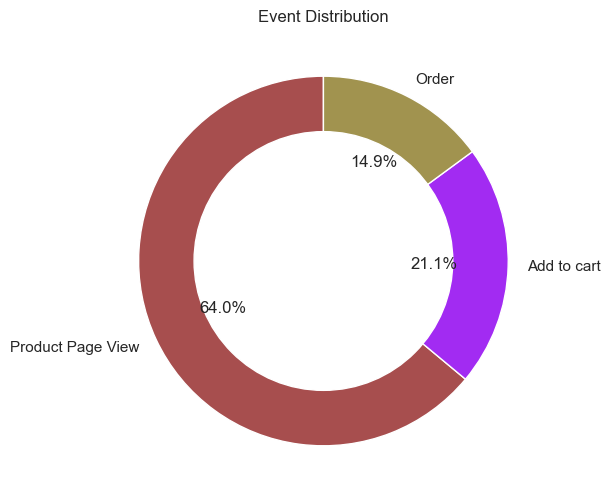

In [28]:

labels = list(infos["event_distribution"].keys())
sizes  = list(infos["event_distribution"].values())
colors = ["#A74E4E", "#A22BF2", "#A1934F"] 
plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=90,
    wedgeprops={'linewidth':1,'edgecolor':'white'}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Event Distribution")
plt.show()


In [29]:
df_freq_clients = df_retailer['customer_id'].value_counts().reset_index()
df_freq_clients.columns = ['customer_id', 'frequency']
df_freq_clients

,customer_id,frequency
0,unknown,189317
1,reth7mdoDJCbkDalaK,6190
2,reJZhNiD0cXQyewGn3,5658
3,reHQRAI2c9b35Tij3O,2070
4,rejr2YF7XyHh2RavMT,1956
...,...,...
1330500,regUDBUsqwqVQiyJy9,1
1330501,reNzHg4c4Q48qTyMJo,1
1330502,reStlfSPxkGOxfo7dj,1
1330503,re84o8z12IdZUEk8Qb,1


In [30]:
# Calculate total quantity sold by brand
quantity_by_product = df_retailer.groupby('brand')['quantity'].sum().sort_values(ascending=False)
quantity_by_product

brand
Science Diet         1264559.0
Hills                 151019.0
Prescription Diet     131021.0
Name: quantity, dtype: float64

In [31]:
df_retailer[df_retailer['sales'].notna()].head(5)

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity,date
8,reOrpt9vhSwhbPVtni,2024-06-06 10:38:51,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-06-06
18,reutQ3jiBX9Li4Ggqi,2024-06-07 11:48:47,Order,Science Diet,SD Ca Adt Lt Ckn 15lb bg,46.99,1.0,2024-06-07
207,unknown,2024-04-13 00:50:50,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,39.98,2.0,2024-04-13
344,reDzpCoOpWJc5l9K3y,2024-03-02 19:42:22,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-03-02
345,reDzpCoOpWJc5l9K3y,2024-04-18 12:27:36,Order,Science Diet,SD Ca Adt Lt SB Ckn 5lb bg,19.99,1.0,2024-04-18


C:\Users\nouts\AppData\Local\Temp\ipykernel_208\3507731850.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


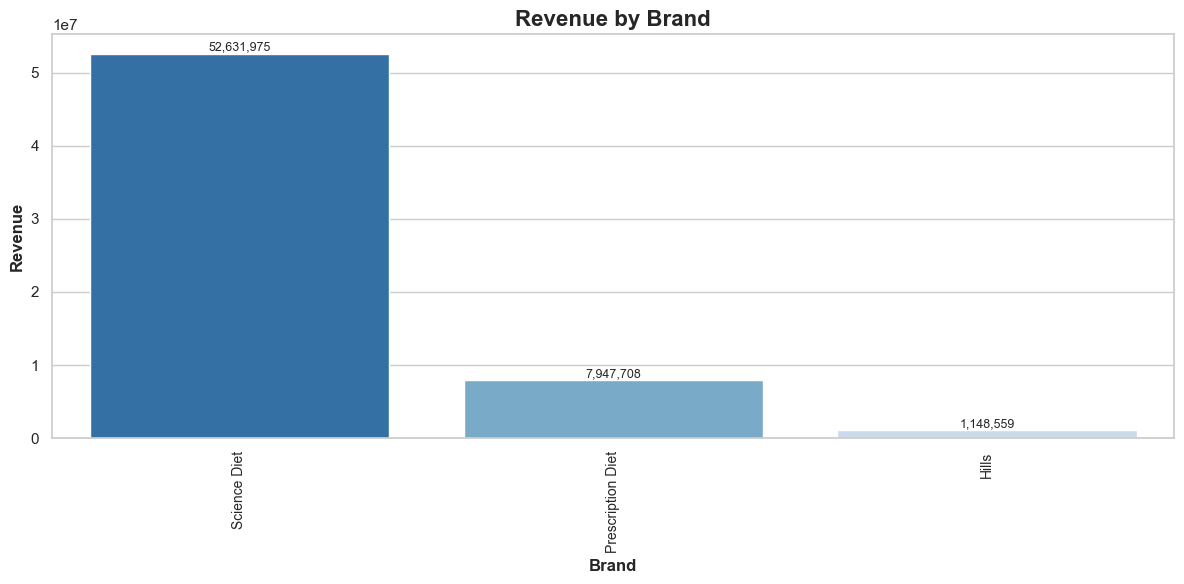

In [32]:
# Set professional style
sns.set_theme(style="whitegrid")

# Compute revenue by brand and sort
revenue_by_brand = (
    df_retailer.groupby('brand')['sales']
    .sum()
    .reset_index()
    .sort_values('sales', ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=revenue_by_brand,
    x='brand',
    y='sales',
    palette='Blues_r'  # nice gradient blue
)

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Brand", fontsize=12, weight='bold')
plt.ylabel("Revenue", fontsize=12, weight='bold')
plt.title("Revenue by Brand", fontsize=16, weight='bold')

# Add values on top of bars (optional)
for i, v in enumerate(revenue_by_brand['sales']):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


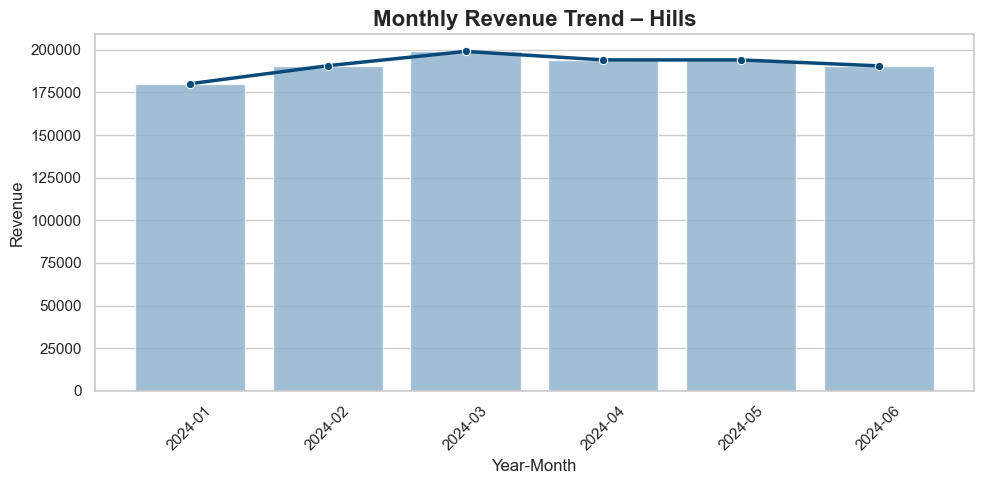

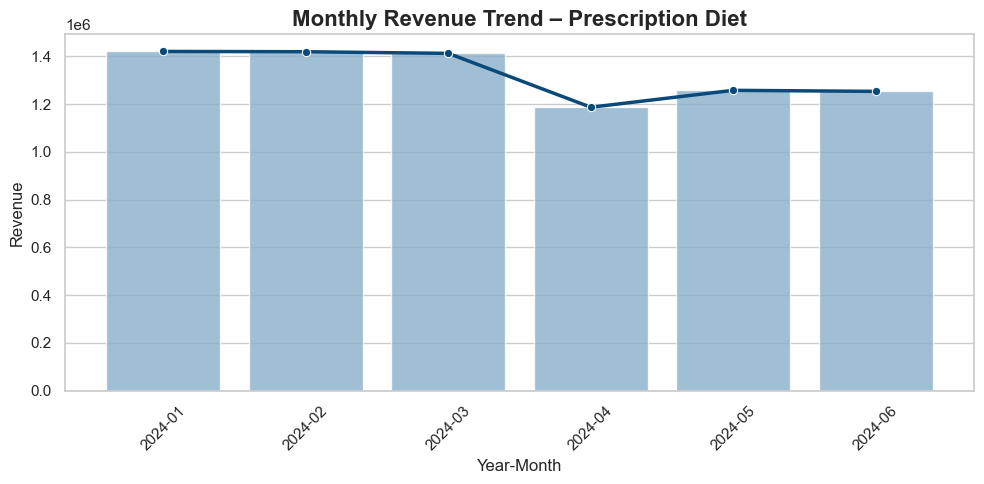

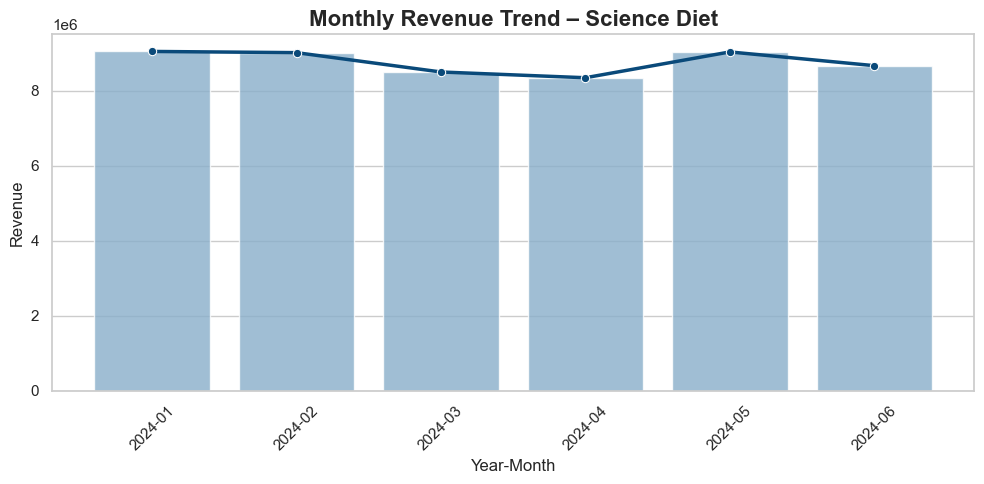

In [33]:
# --- STYLE ---
sns.set_theme(style="whitegrid")   # clean modern style

# Ensure date column is datetime
df_retailer['date'] = pd.to_datetime(df_retailer['date'], errors='coerce')

# Keep only valid sales
df_sales = df_retailer[df_retailer['sales'].notna()].copy()

# Create year-month column
df_sales['year_month'] = df_sales['date'].dt.to_period('M').astype(str)

# Monthly revenue per brand
monthly_revenue = (
    df_sales.groupby(['year_month', 'brand'])['sales']
    .sum()
    .reset_index()
)

# List of unique brands
brands = monthly_revenue['brand'].unique()

# ----- BEAUTIFUL CHART FOR EACH BRAND -----
for b in brands:
    brand_data = monthly_revenue[monthly_revenue['brand'] == b]

    plt.figure(figsize=(10,5))

    # BARPLOT
    sns.barplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#7EB0D5",
        alpha=0.8
    )

    # LINE on top
    sns.lineplot(
        data=brand_data,
        x='year_month',
        y='sales',
        color="#0A4A7A",
        marker='o',
        linewidth=2.5
    )

    plt.xticks(rotation=45)
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Revenue", fontsize=12)
    plt.title(f"Monthly Revenue Trend – {b}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()


In [34]:
# Pivot table by brand instead of product_name
brand_stats = df_retailer.pivot_table(
    index='brand',
    columns='event_name',
    values='customer_id',
    aggfunc='count'
)

# Replace NaN with zeros
brand_stats = brand_stats.fillna(0)

# Funnel metrics
brand_stats['cart_rate'] = brand_stats['Add to cart'] / brand_stats['Product Page View']
brand_stats['order_rate'] = brand_stats['Order'] / brand_stats['Product Page View']
brand_stats['conversion_cart_to_order'] = brand_stats['Order'] / brand_stats['Add to cart']

# Top 20 brands by order rate
brand_stats.sort_values('order_rate', ascending=False)


event_name,Add to cart,Order,Product Page View,cart_rate,order_rate,conversion_cart_to_order
brand,,,,,,
Hills,137429,112298,233026,0.589758,0.481912,0.817135
Science Diet,1652119,1201422,5004995,0.330094,0.240045,0.727201
Prescription Diet,236211,116815,894494,0.264072,0.130593,0.494537


STATISTIQUES RFM
             recency      frequency      monetary
count  499542.000000  499542.000000  4.995420e+05
mean       66.938360       2.863693  1.235697e+02
std        53.706236      40.258986  1.738060e+03
min         0.000000       1.000000  0.000000e+00
25%        20.000000       1.000000  4.197000e+01
50%        52.000000       2.000000  7.898000e+01
75%       112.000000       3.000000  1.503100e+02
max       181.000000   28282.000000  1.222884e+06

DISTRIBUTION DES SEGMENTS RFM
segment
Lost                   202533
Loyal Customers         88212
Champions               74855
Cant Lose Them          70597
At Risk                 47411
Potential Loyalists     15934
Name: count, dtype: int64


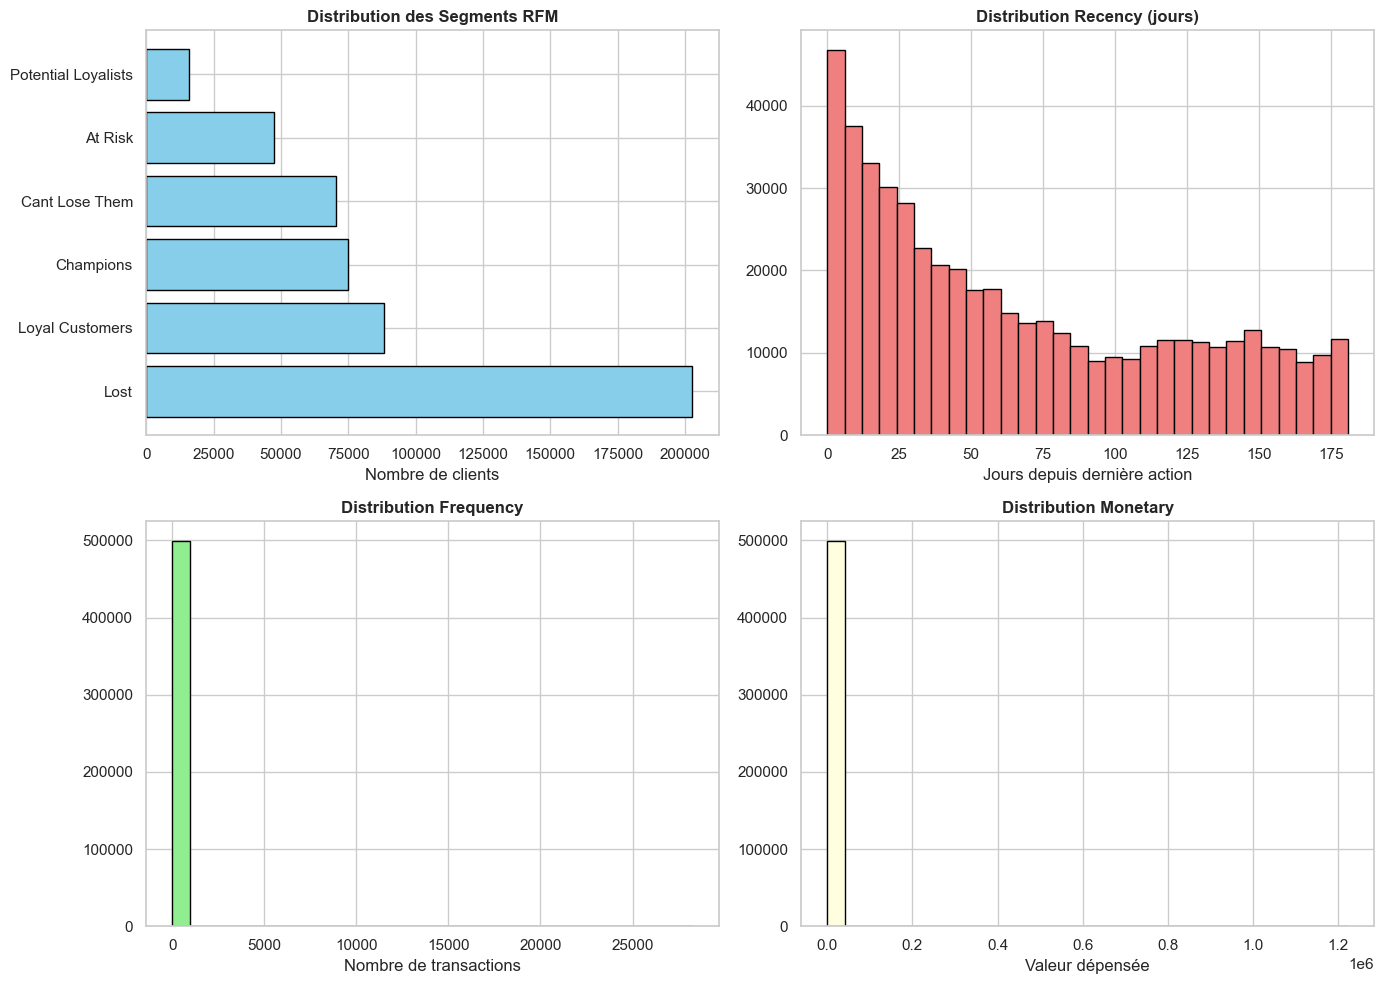


STATISTIQUES PAR SEGMENT
                        recency  frequency    monetary
segment                                               
At Risk               32.208749   1.267090   40.076901
Cant Lose Them        82.048855   1.145658   38.660918
Champions             12.035415   7.348701  333.937911
Lost                 110.555144   1.829415   82.506837
Loyal Customers       29.568959   3.836485  167.423900
Potential Loyalists   13.728944   1.917472   39.082188


In [ ]:
# ===== RFM with 1-5 scores =====
# R = Recency (days since last action)
# F = Frequency (number of transactions)
# M = Monetary (total spend)

# Ensure timestamp is datetime
if not np.issubdtype(df_retailer['timestamp_utc'].dtype, np.datetime64):
    df_retailer['timestamp_utc'] = pd.to_datetime(df_retailer['timestamp_utc'], errors='coerce')

# Determine reference date
max_date = df_retailer['timestamp_utc'].max()

# Compute RFM per customer
df_rfm = df_retailer[df_retailer['sales'].notna()].groupby('customer_id').agg({
    'timestamp_utc': lambda x: (max_date - x.max()).days,  # recency
    'customer_id': 'count',  # frequency
    'sales': 'sum'  # monetary
}).rename(columns={
    'timestamp_utc': 'recency',
    'customer_id': 'frequency',
    'sales': 'monetary'
})

print("=" * 60)
print("STATISTIQUES RFM")
print("=" * 60)
print(df_rfm.describe())

# Create 1-5 scores (5 = best)
# For Recency: lower days => better => label order reversed
try:
    df_rfm['R_score'] = pd.qcut(df_rfm['recency'], q=5, labels=[5,4,3,2,1], duplicates='drop').astype(int)
except Exception:
    df_rfm['R_score'] = pd.cut(df_rfm['recency'], bins=5, labels=[5,4,3,2,1]).astype(int)

# For Frequency and Monetary: higher => better
try:
    df_rfm['F_score'] = pd.qcut(df_rfm['frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5], duplicates='drop').astype(int)
except Exception:
    df_rfm['F_score'] = pd.cut(df_rfm['frequency'], bins=5, labels=[1,2,3,4,5]).astype(int)

try:
    df_rfm['M_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=[1,2,3,4,5], duplicates='drop').astype(int)
except Exception:
    df_rfm['M_score'] = pd.cut(df_rfm['monetary'], bins=5, labels=[1,2,3,4,5]).astype(int)

# Aggregate numeric RFM
df_rfm['rfm_sum'] = df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score']

# Segmentation based on rfm_sum (adjust thresholds as needed)
def segment_by_sum(s):
    if s >= 13:
        return 'Champions'
    elif s >= 10:
        return 'Loyal Customers'
    elif s >= 7:
        return 'Potential Loyalists'
    elif s >= 5:
        return 'At Risk'
    else:
        return 'Lost'

df_rfm['segment'] = df_rfm['rfm_sum'].apply(segment_by_sum)

print("\n" + "=" * 60)
print("DISTRIBUTION DES SEGMENTS RFM (1-5)")
print("=" * 60)
print(df_rfm['segment'].value_counts())

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution des segments
segment_counts = df_rfm['segment'].value_counts()
axes[0, 0].barh(segment_counts.index, segment_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution des Segments RFM', fontweight='bold')
axes[0, 0].set_xlabel('Nombre de clients')

# 2. Recency
axes[0, 1].hist(df_rfm['recency'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution Recency (jours)', fontweight='bold')
axes[0, 1].set_xlabel('Jours depuis dernière action')

# 3. Frequency
axes[1, 0].hist(df_rfm['frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution Frequency', fontweight='bold')
axes[1, 0].set_xlabel('Nombre de transactions')

# 4. Monetary
axes[1, 1].hist(df_rfm['monetary'], bins=30, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Distribution Monetary', fontweight='bold')
axes[1, 1].set_xlabel('Valeur dépensée')

plt.tight_layout()
plt.show()

# Statistiques par segment
print("\n" + "=" * 60)
print("STATISTIQUES PAR SEGMENT")
print("=" * 60)
print(df_rfm.groupby('segment')[['recency', 'frequency', 'monetary', 'R_score','F_score','M_score','rfm_sum']].mean())